In [530]:
import numpy as np
import pandas as pd
# %pip install liac-arff
import arff
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
data = arff.load(open('dataset_', 'r'))
df = pd.DataFrame(data['data'], columns=[a[0] for a in data['attributes']])
df.tail()

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
15850,181313774,"$ 80,000 - $89,999",OWNER,Italian,N,3,25-29,English,9973 PETUNIA AVE,CA,FOUNTAIN VALLEY,ORANGE,92708,$0.01 - $0.50,SunOnly,MW,0,Partner,NO
15851,180491046,"$ 80,000 - $89,999",OWNER,Italian,N,3,25-29,English,9973 PETUNIA AVE,CA,FOUNTAIN VALLEY,ORANGE,92708,$0 - $0.01,SunOnly,MW,0,Partner,NO
15852,120500200,"$150,000 - $174,999",OWNER,Irish,Y,12,60-64,English,9980 GRINDLAY ST,CA,CYPRESS,ORANGE,90630,$1.00 - $1.99,7Day,MW,0,DirectMl,NO
15853,180551649,"$ 80,000 - $89,999",OWNER,Hispanic,Y,30,None,English,999 BURR ST,CA,CORONA,RIVERSIDE,92882,$0 - $0.01,SunOnly,FE,0,Partner,NO
15854,181401440,"$175,000 - $199,999",OWNER,Hispanic,N,22,70-74,Spanish,999 S SEDONA LN,CA,ANAHEIM,ORANGE,92808,$0.01 - $0.50,SunOnly,FW,0,Partner,YES


In [532]:
df.shape


(15855, 19)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  reward program      15

In [534]:
df.describe(include = "all")

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
count,1.585500e+04,15855,15855,15855,15855,15855.000000,15747,14848,15855,15855,15855,15855,15855.000000,15669,15855,15726,15855.000000,15855,15855
unique,NaN,18,2,73,2,NaN,12,37,15742,1,56,4,NaN,14,28,9,NaN,51,2
top,NaN,"Under $20,000",OWNER,Hispanic,N,NaN,50-54,English,2000 MAIN ST,CA,ANAHEIM,ORANGE,NaN,$0.01 - $0.50,SunOnly,MW,NaN,Partner,NO
freq,NaN,1917,11690,4087,12397,NaN,1913,11005,3,15855,1567,14351,NaN,2950,6186,4040,NaN,4387,12818
mean,1.643729e+08,NaN,NaN,NaN,NaN,13.546137,NaN,NaN,NaN,NaN,NaN,NaN,92424.541911,NaN,NaN,NaN,1.100662,NaN,NaN
std,2.356755e+07,NaN,NaN,NaN,NaN,11.770368,NaN,NaN,NaN,NaN,NaN,NaN,733.648427,NaN,NaN,NaN,9.555332,NaN,NaN
min,1.100011e+08,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,90603.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,1.501824e+08,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,92627.000000,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1.803333e+08,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,92688.000000,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1.806362e+08,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,92806.000000,NaN,NaN,NaN,0.000000,NaN,NaN


In [535]:
global_mean = df['Subscriber'].value_counts(normalize=True)['YES']
print(global_mean)

0.19154840744244717


almost 81% of subscriber is no

## Correlation Matrix

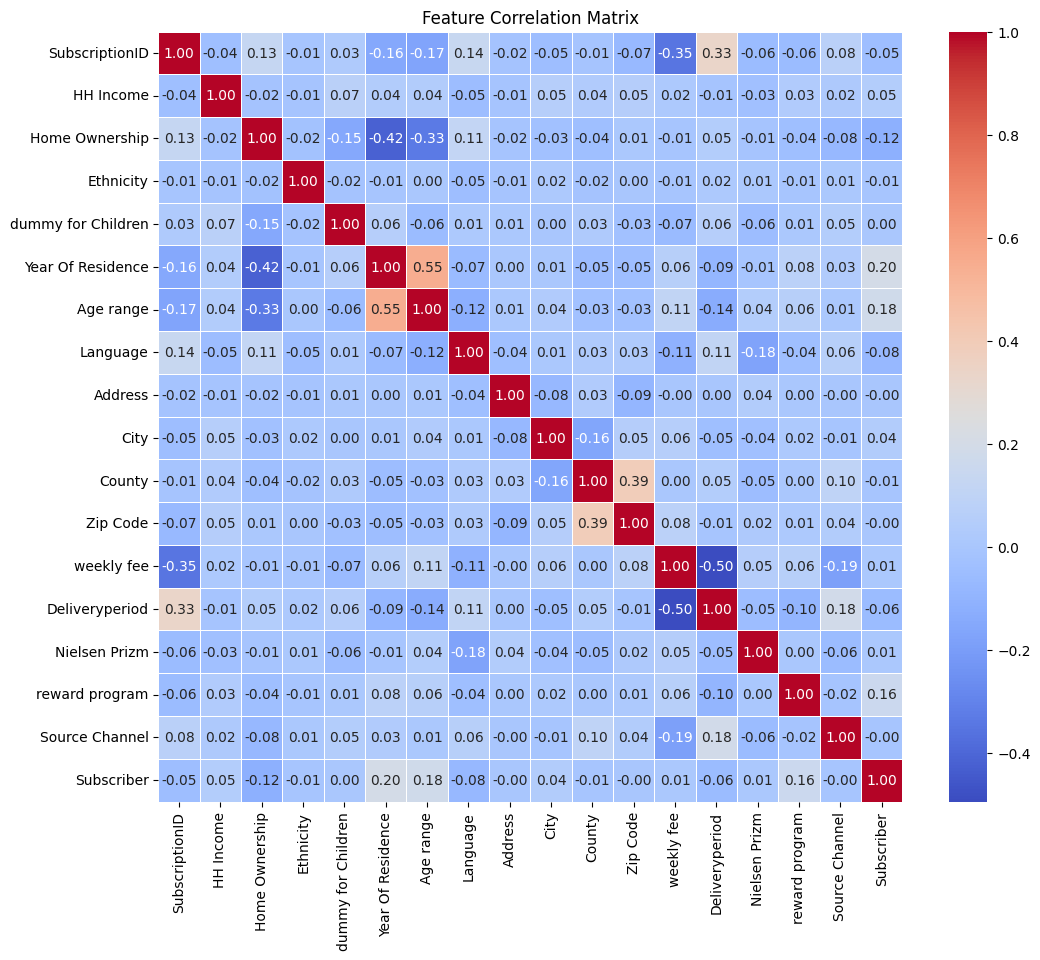

In [536]:
df_corr = df.copy()

for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

correlation_matrix = df_corr.drop(columns = "State").corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Unnecessary columns

SubscriptionID - Every SubscriptionID is unique

Address -  Almost every Address unique 

State - There's only 1 state

In [537]:
df.drop(columns=['SubscriptionID', 'Address','State'], inplace = True)

In [538]:
print(df["Zip Code"].unique().size)
print(df["City"].unique().size)

117
56


I will use only one of them for the model.

The Zip Code column gives the false impression of a numerical value and has many more unique values, but it is possible that specific zip codes have more or fewer subscribers.

## missing values:

In [539]:
print(df.isna().sum())
print("")
print(sum(df["Ethnicity"] == "unknown"))

HH Income                0
Home Ownership           0
Ethnicity                0
dummy for Children       0
Year Of Residence        0
Age range              108
Language              1007
City                     0
County                   0
Zip Code                 0
weekly fee             186
Deliveryperiod           0
Nielsen Prizm          129
reward program           0
Source Channel           0
Subscriber               0
dtype: int64

1007


Missing values:

age range - 108

Ethnicity - 1007

language - 1007

weekly fee - 186

Nielsen Prizm - 129

In [540]:
df.loc[(df["Ethnicity"] == "unknown") & ~(df["Language"].isna())].empty

True

Ethnicity = unknown <=> Language = NA

In [541]:
df['Language'] = df['Language'].fillna('unknown')

## Object columns with many various occurrences

In [542]:
df.groupby(["Ethnicity", "Language"]).size().sort_values()

Ethnicity  Language
Albanian   English        1
Bhutanese  English        1
Estonian   English        1
Ghanaian   Ga             1
Iraqi      English        1
                       ... 
German     English      879
unknown    unknown     1007
Hispanic   English     1478
           Spanish     2609
English    English     3308
Length: 109, dtype: int64

only 108 combinations

In [543]:
df["Ethnicity"].unique().size, df["Language"].unique().size

(73, 38)

Checking if some Ethnicities are special subscribers ("NO" between 0.75 and 0.90 because it's unusual and count over 10)

In [544]:
cross_eth = pd.crosstab(df['Ethnicity'], df['Subscriber'], normalize='index')
cross_eth = cross_eth[(cross_eth['NO']>0.9)|(cross_eth['NO']<0.75)]
eth_cnt = df['Ethnicity'].value_counts()
eth_cnt = eth_cnt[eth_cnt>10].to_frame(name='count')
cross_eth.merge(eth_cnt, left_index=True, right_index=True, how='inner')

,NO,YES,count
Ethnicity,,,
Belgian,0.916667,0.083333,12
Czech,0.700000,0.300000,30
Dutch,0.745000,0.255000,200
German,0.746681,0.253319,904
Hungarian,0.913043,0.086957,46
Japanese,0.729064,0.270936,203
"Khmer (Kampuchean, Cambodian)",0.937500,0.062500,16
Lithuanian,0.727273,0.272727,11
Norwegian,0.709677,0.290323,62


adding those with count under 10 to other (they can be misleading and and it will reduce the number of columns after encoding)

In [545]:
eth_cnt = df['Ethnicity'].value_counts()
eth_cnt[eth_cnt<=10].size

34

Almost the half of Ethnicities are gone

In [546]:
major_ethnicities = eth_cnt[eth_cnt >10].index.tolist()
df['Ethnicity_filtered'] = df['Ethnicity'].apply(lambda x: x if x in major_ethnicities else 'Other Ethnicity')

In [547]:
def scaler(v,x=1):
    return (v - v.min()) / (v.max() - v.min()) * x

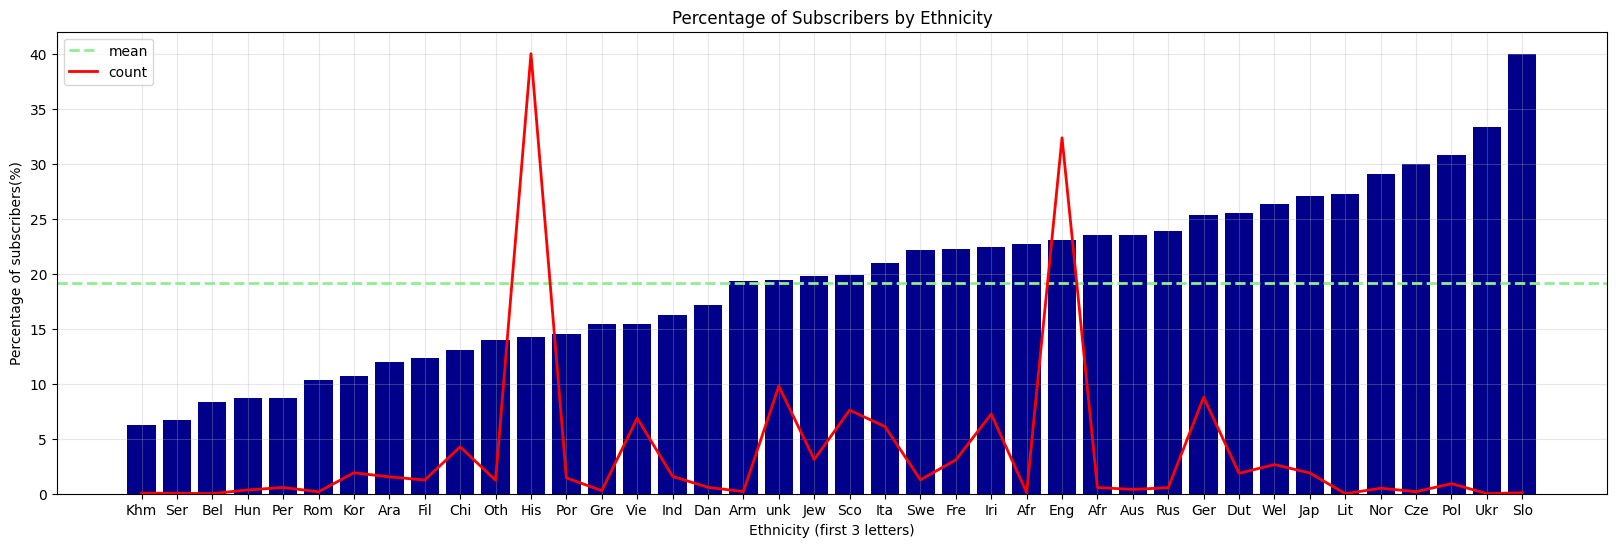

In [548]:
eth_cnt2 = df['Ethnicity_filtered'].value_counts()
cross_eth2 = pd.crosstab(df['Ethnicity_filtered'], df['Subscriber'], normalize='index')["YES"].sort_values()
short_labels = [str(x)[:3] for x in cross_eth2.index]
plt.figure(figsize=(20, 6))
plt.bar(cross_eth2.index, cross_eth2 * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=2, label='mean')
plt.plot(scaler(eth_cnt2[cross_eth2.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Ethnicity')
plt.xlabel('Ethnicity (first 3 letters)')
plt.ylabel('Percentage of subscribers(%)')
plt.xticks(ticks=range(len(cross_eth2.index)), labels=short_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Similarly for Language and Cities:

In [549]:
cross_lang = pd.crosstab(df['Language'], df['Subscriber'], normalize='index')
cross_lang = cross_lang[(cross_lang['NO']>0.9)|(cross_lang['NO']<0.75)]
Lang_cnt = df['Language'].value_counts()
Lang_cnt = Lang_cnt[Lang_cnt > 10].to_frame(name='count')
cross_lang.merge(Lang_cnt, left_index=True, right_index=True, how='inner')

,NO,YES,count
Language,,,
Chinese,0.913043,0.086957,161
Hebrew,1.000000,0.000000,15
Korean,0.929204,0.070796,113
Romanian,0.933333,0.066667,15


chinese and korean languages show signs to be reluctant subscribers

In [550]:
lang_cnt = df['Language'].value_counts()
lang_cnt[lang_cnt<=10].size

23

Over the half of languages

In [551]:
major_languages = Lang_cnt[Lang_cnt > 10].index.tolist()
df['Language_filtered'] = df['Language'].apply(lambda x: x if x in major_languages else 'Other Language')

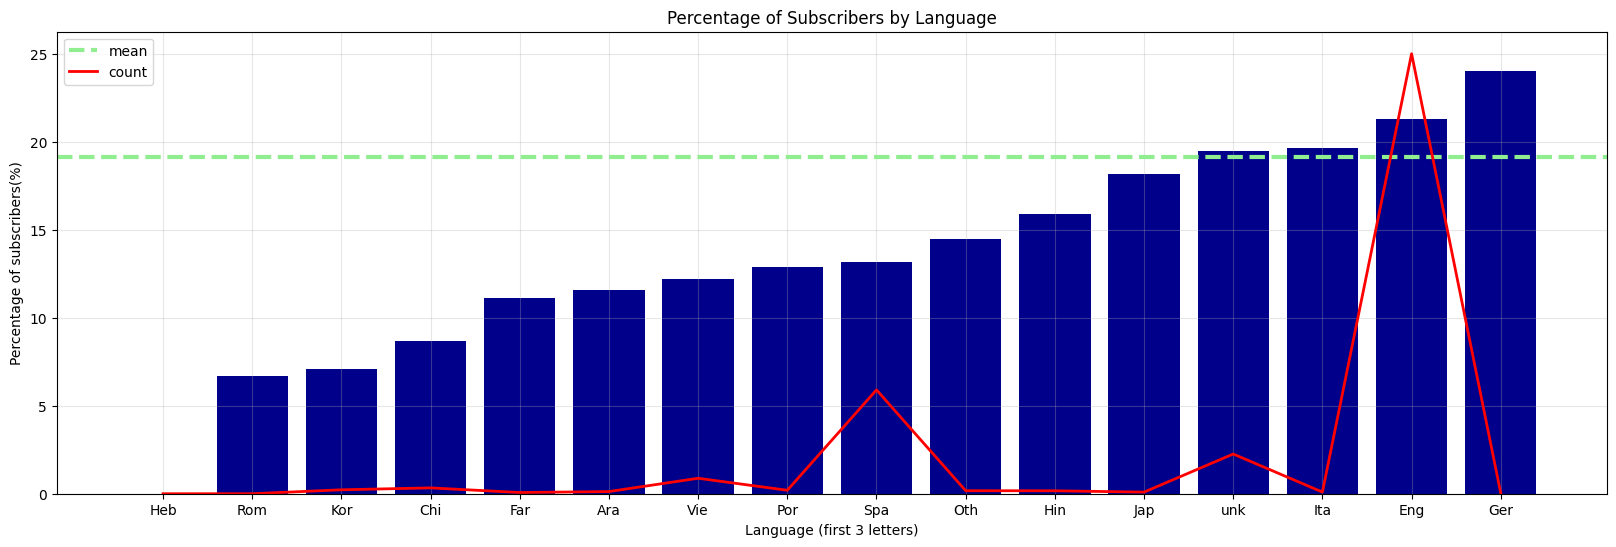

In [552]:
lang_cnt2 = df["Language_filtered"].value_counts()
cross_lang2 = pd.crosstab(df['Language_filtered'], df['Subscriber'], normalize='index')["YES"].sort_values()
short_labels = [str(x)[:3] for x in cross_lang2.index]
plt.figure(figsize=(20, 6))
plt.bar(cross_lang2.index, cross_lang2 * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(lang_cnt2[cross_lang2.index],25), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Language')
plt.xlabel('Language (first 3 letters)')
plt.ylabel('Percentage of subscribers(%)')
plt.xticks(ticks=range(len(cross_lang2.index)), labels=short_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

And cities:

In [553]:
df['City'].unique().size

56

In [554]:
cross_city = pd.crosstab(df['City'], df['Subscriber'], normalize='index')
cross_city = cross_city[(cross_city['NO']>0.9)|(cross_city['NO']<0.75)]
city_cnt = df['City'].value_counts()
city_cnt = city_cnt[city_cnt>10].to_frame(name='count')
cross_city.merge(city_cnt, left_index=True, right_index=True, how='inner')

,NO,YES,count
City,,,
CAPISTRANO BEACH,0.666667,0.333333,27
CHINO HILLS,0.734940,0.265060,83
LA PALMA,0.680000,0.320000,75
MIDWAY CITY,0.653846,0.346154,26
MISSION VIEJO,0.741414,0.258586,495
SEAL BEACH,0.702128,0.297872,141
VILLA PARK,0.552632,0.447368,38
YORBA LINDA,0.736434,0.263566,387


Let's add to other those with count under 25

In [555]:
city_cnt = df['City'].value_counts()
city_cnt[city_cnt<=25].size

6

In [556]:
top_cities = city_cnt[city_cnt > 25].index.tolist()
df['City_filtered'] = df['City'].apply(lambda x: x if x in top_cities else 'Other City')

## Dealing with range columns

In [557]:
print(df["weekly fee"].unique())
print(df["HH Income"].unique())
print(df["Age range"].unique())

['$7.00 - $7.99' '$0.01 - $0.50' '$1.00 - $1.99' '$8.00 - $8.99'
 '$0 - $0.01' '$2.00 - $2.99' '$9.00 - $9.99' '$4.00 - $4.99'
 '$0.51 - $0.99' '$3.00 - $3.99' '$5.00 - $5.99' '$6.00 - $6.99'
 '$10.00 - $10.99' None '$0']
['$  30,000 - $39,999' '$500,000 Plus' '$100,000 - $124,999'
 '$200,000 - $249,999' '$  50,000 - $59,999' '$150,000 - $174,999'
 '$400,000 - $499,999' '$175,000 - $199,999' '$125,000 - $149,999'
 'Under $20,000' '$  80,000 - $89,999' '$  90,000 - $99,999'
 '$300,000 - $399,999' '$  20,000 - $29,999' '$  70,000 - $79,999'
 '$  60,000 - $69,999' '$  40,000 - $49,999' '$250,000 - $299,999']
['25-29' '50-54' '45-49' '55-59' '60-64' '75 years or more' '65-69'
 '70-74' '40-44' '24 years or less' '35-39' '30-34' None]


Let's set them as the mean value of the range

In [558]:
income = {'Under $20,000': 10000.0, '$  20,000 - $29,999': 25000.0, '$  30,000 - $39,999': 35000.0,
        '$  40,000 - $49,999': 45000.0,'$  50,000 - $59,999': 55000.0,'$  60,000 - $69,999': 65000.0,
        '$  70,000 - $79,999': 75000.0, '$  80,000 - $89,999': 85000.0,'$  90,000 - $99,999': 95000.0,
        '$100,000 - $124,999': 112500.0,'$125,000 - $149,999': 137500.0,'$150,000 - $174,999': 162500.0,
        '$175,000 - $199,999': 187500.0,'$200,000 - $249,999': 225000.0,'$250,000 - $299,999': 275000.0,
        '$300,000 - $399,999': 350000.0,'$400,000 - $499,999': 450000.0,'$500,000 Plus': 750000.0}

fee = {'$0': 0.0,'$0 - $0.01': 0.005,'$0.01 - $0.50': 0.255,
    '$0.51 - $0.99': 0.75,'$1.00 - $1.99': 1.50,'$2.00 - $2.99': 2.50,
    '$3.00 - $3.99': 3.50,'$4.00 - $4.99': 4.50,'$5.00 - $5.99': 5.50,
    '$6.00 - $6.99': 6.50,'$7.00 - $7.99': 7.50,'$8.00 - $8.99': 8.50,
    '$9.00 - $9.99': 9.50,'$10.00 - $10.99': 10.50}

age = {'24 years or less': 21.0,'25-29': 27.0,'30-34': 32.0,
        '35-39': 37.0,'40-44': 42.0,'45-49': 47.0,
        '50-54': 52.0,'55-59': 57.0,'60-64': 62.0,
        '65-69': 67.0,'70-74': 72.0,'75 years or more': 80.0}

df['HH Income'] = df['HH Income'].astype('category').cat.rename_categories(income).astype(float)
df['weekly fee'] = df['weekly fee'].astype('category').cat.rename_categories(fee).astype(float)
df['Age'] = df['Age range'].astype('category').cat.rename_categories(age).astype(float)


In [559]:
df.head()

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber,Ethnicity_filtered,Language_filtered,City_filtered,Age
0,35000.0,RENTER,German,N,1,25-29,German,LONG BEACH,LOS ANGELES,90802,7.500,7Day,FM,0,CircAdm,NO,German,German,LONG BEACH,27.0
1,750000.0,OWNER,unknown,Y,14,50-54,unknown,NEWPORT COAST,ORANGE,92657,0.255,SunOnly,MW,0,Partner,YES,unknown,unknown,NEWPORT COAST,52.0
2,112500.0,OWNER,Italian,Y,7,45-49,English,IRVINE,ORANGE,92604,0.255,SunOnly,MW,0,Partner,YES,Italian,English,IRVINE,47.0
3,225000.0,OWNER,English,N,23,55-59,English,LAGUNA NIGUEL,ORANGE,92677,1.500,SunOnly,MW,1,Internet,NO,English,English,LAGUNA NIGUEL,57.0
4,55000.0,OWNER,Italian,N,23,60-64,English,RANCHO SANTA MARGARITA,ORANGE,92688,8.500,Thu-Sun,MM,0,Crew,YES,Italian,English,RANCHO SANTA MARGARITA,62.0


In [560]:
df.drop(columns='Age range', inplace=True)

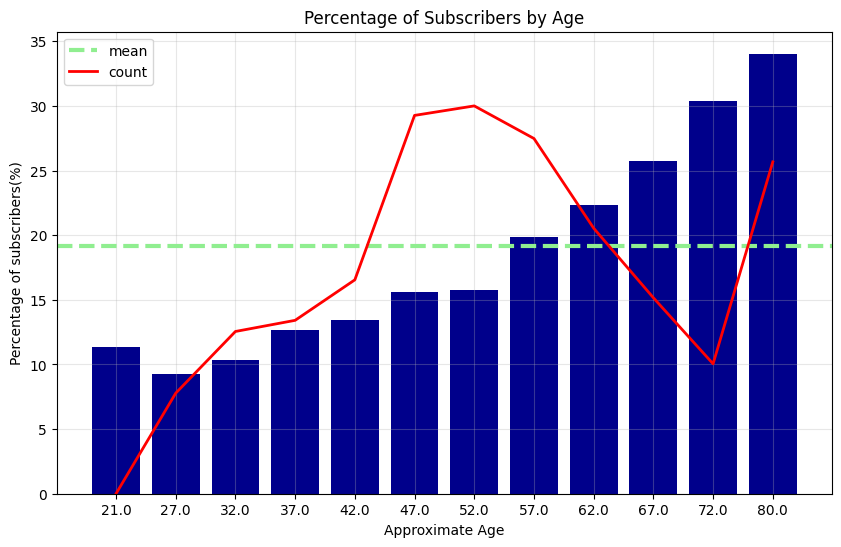

In [561]:
age_cnt = df['Age'].value_counts()
cross_age = pd.crosstab(df['Age'], df['Subscriber'], normalize='index')["YES"]
plt.figure(figsize=(10, 6))
plt.bar(cross_age.index.astype(str), cross_age * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_age.index.astype(str), scaler(age_cnt[cross_age.index],30), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Age')
plt.xlabel('Approximate Age')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

there is a noticeable relation between age and being a subscriber

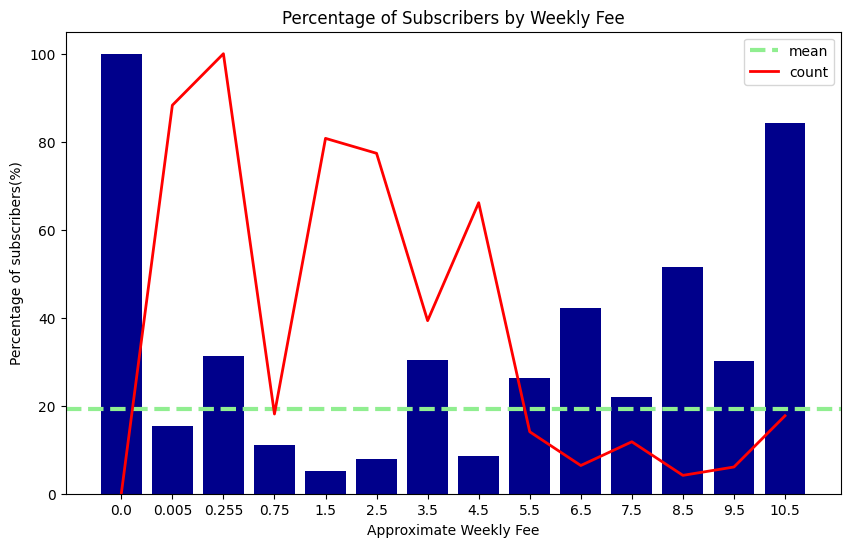

In [562]:
fee_cnt = df['weekly fee'].value_counts()
cross_fee = pd.crosstab(df['weekly fee'], df['Subscriber'], normalize='index')["YES"]
plt.figure(figsize=(10, 6))
plt.bar(cross_fee.index.astype(str), cross_fee * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_fee.index.astype(str), scaler(fee_cnt[cross_fee.index],100), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Weekly Fee')
plt.xlabel('Approximate Weekly Fee')
plt.ylabel('Percentage of subscribers(%)')
plt.legend()
plt.show()

no noticeable relation

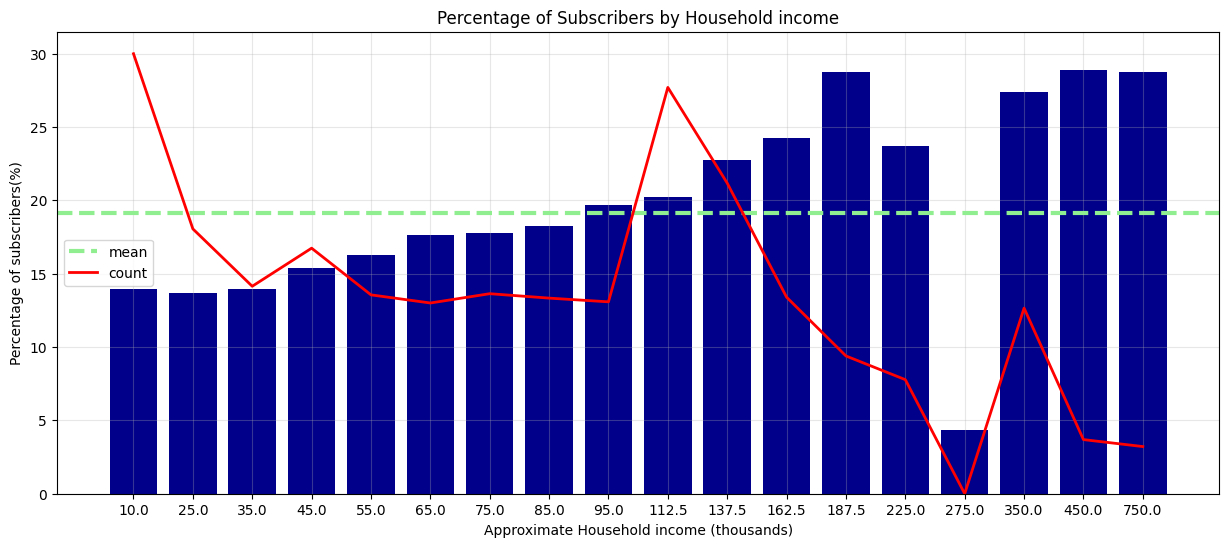

In [563]:
income_cnt = df['HH Income'].value_counts()
cross_income = pd.crosstab(df['HH Income']/1000, df['Subscriber'], normalize='index')["YES"]
plt.figure(figsize=(15, 6))
plt.bar(cross_income.index.astype(str), cross_income * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot((cross_income.index).astype(str), scaler(income_cnt[cross_income.index * 1000],30), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Household income')
plt.xlabel('Approximate Household income (thousands)')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

slight proportionality between HH income and being a subscriber

## Deliveryperiod column

In [564]:
df["Deliveryperiod"].unique()

array(['7Day', 'SunOnly', 'Thu-Sun', 'SatSun', '7DayOL', 'SoooooS',
       'oMTWTFo', 'THU-SUN', 'Mon-Fri', '7DAY', 'SooooFS', 'SooooooT',
       '7DayT', 'Fri-Sun', 'SoooTFS', 'SunOnlyT', 'Soooooo', 'Thu-SunT',
       'Fri-SunT', 'SoooTFST', 'Sun-Fri', 'sunonly', 'SoooooST', '7day',
       'Sun-FriT', 'SUNONLY', 'thu-sun', 'SooooFST'], dtype=object)

Some similar results. It should be cleaned. T is propably short for Trial and OL is e.g. Online

Let's clean the "Deliveryperiod" column and create 3 new features: "T", "OL", "Deliverydays"

In [565]:
df['T'] = df['Deliveryperiod'].astype(str).str.upper().str.endswith('T').astype(int)
df['OL'] = df['Deliveryperiod'].astype(str).str.upper().str.contains('OL').astype(int)

def clean_delivery_period(val):
    val = str(val).lower()
    if '7day' in val: return '7day'
    if 'sunonly' in val or 'soooooo' in val: return 'SunOnly'
    if 'thu-sun' in val or 'soootfs' in val: return 'Thu-Sun'
    if 'fri-sun' in val or 'soooofs' in val: return 'Fri-Sun'
    if 'satsun' in val or 'sooooos' in val: return 'Sat-Sun'
    if 'mon-fri' in val or 'omtwtfo' in val: return 'Mon-Fri'
    if 'sun-fri' in val: return 'Sun-Fri'

days_map = {'7day': 7,'Sun-Fri': 6,'Mon-Fri': 5,'Thu-Sun': 4,
                'Fri-Sun': 3,'Sat-Sun': 2,'SunOnly': 1}

df['Deliveryperiod_clean'] = df['Deliveryperiod'].apply(clean_delivery_period)
df['Deliverydays'] = df['Deliveryperiod_clean'].map(days_map)

In [566]:
df.head()

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Language,City,County,Zip Code,weekly fee,...,Source Channel,Subscriber,Ethnicity_filtered,Language_filtered,City_filtered,Age,T,OL,Deliveryperiod_clean,Deliverydays
0,35000.0,RENTER,German,N,1,German,LONG BEACH,LOS ANGELES,90802,7.500,...,CircAdm,NO,German,German,LONG BEACH,27.0,0,0,7day,7
1,750000.0,OWNER,unknown,Y,14,unknown,NEWPORT COAST,ORANGE,92657,0.255,...,Partner,YES,unknown,unknown,NEWPORT COAST,52.0,0,0,SunOnly,1
2,112500.0,OWNER,Italian,Y,7,English,IRVINE,ORANGE,92604,0.255,...,Partner,YES,Italian,English,IRVINE,47.0,0,0,SunOnly,1
3,225000.0,OWNER,English,N,23,English,LAGUNA NIGUEL,ORANGE,92677,1.500,...,Internet,NO,English,English,LAGUNA NIGUEL,57.0,0,0,SunOnly,1
4,55000.0,OWNER,Italian,N,23,English,RANCHO SANTA MARGARITA,ORANGE,92688,8.500,...,Crew,YES,Italian,English,RANCHO SANTA MARGARITA,62.0,0,0,Thu-Sun,4


There's no need to keep both Deliveryperiod end Deliverydays. Derliverydays has a certain order.

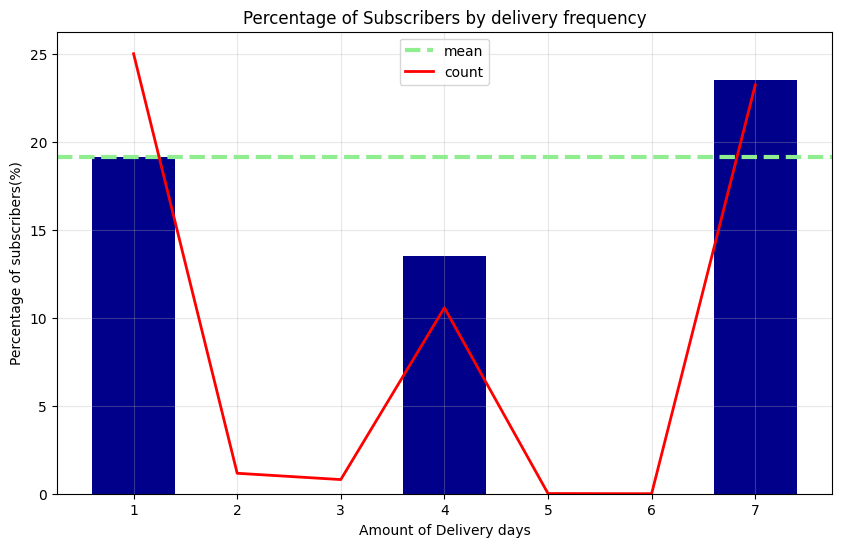

In [567]:
dd_cnt = df['Deliverydays'].value_counts()
cross_dd = pd.crosstab(df['Deliverydays'], df['Subscriber'], normalize='index')["YES"]
plt.figure(figsize=(10, 6))
plt.bar(cross_dd.index.astype(str), cross_dd * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_dd.index.astype(str), scaler(dd_cnt[cross_dd.index],25), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by delivery frequency')
plt.xlabel('Amount of Delivery days')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

But the amount of days as a numeric feature does not affect the subscriber value

In [568]:
pd.crosstab(df['T'], df['Subscriber'], normalize='index')

Subscriber,NO,YES
T,,
0,0.803849,0.196151
1,1.000000,0.000000


with T always not a subscriber

In [569]:
df['T'].value_counts()

T
0    15483
1      372
Name: count, dtype: int64

In [570]:
pd.crosstab(df['OL'], df['Subscriber'], normalize='index')

Subscriber,NO,YES
OL,,
0,0.805845,0.194155
1,0.995413,0.004587


with OL almost always not a subscriber

In [571]:
df['OL'].value_counts()

OL
0    15637
1      218
Name: count, dtype: int64

## converting object columns

In [572]:
df['is_home_owner'] = (df['Home Ownership'] == 'OWNER').astype(int)
df['has_children'] = (df['dummy for Children'] == 'Y').astype(int)
df['Subscriber'] = (df['Subscriber'] == 'YES').astype(int)

## Source Channel column

In [573]:
df["Source Channel"].sort_values().unique(), df["Source Channel"].unique().size

(array(['AdvAdm', 'Agent', 'Assoc', 'CCAuto', 'CSR', 'Chat', 'CircAdm',
        'Contest', 'Counter', 'Crew', 'Crew1', 'Crew2', 'Crew3', 'Crew4',
        'CustCall', 'DIRECTM2', 'DIRECTM4', 'DTI', 'DirectMl', 'EMAIL4',
        'Email', 'Event', 'Event1', 'ExecAdm', 'FUSS', 'Gift', 'INTERNET',
        'InPaper', 'Internet', 'Internt4', 'Kiosk', 'Kiosk1', 'Kiosk2',
        'Kiosk3', 'Kiosk4', 'Kiosk5', 'OutMedia', 'PARTNER', 'Partner',
        'RetMail', 'RetenIn', 'RetenOut', 'SCINSRT4', 'SCINSRT6',
        'SCinsert', 'System', 'TMC', 'TeleIn', 'TeleOut', 'VRU',
        'iSrvices'], dtype=object),
 51)

Let's combine similar varieties

In [574]:
def clean_source_channel(val):
    val = str(val).upper()
    
    if 'CREW' in val: return 'Crew'
    if 'KIOSK' in val: return 'Kiosk'
    if 'INTERNET' in val or 'INTERNT' in val: return 'Internet'
    if 'PARTNER' in val: return 'Partner'
    if 'DIRECTM' in val or 'DIRECTML' in val: return 'DirectMail'
    if 'SCINSRT' in val or 'SCINSERT' in val: return 'SCInsert'
    if 'EMAIL' in val: return 'Email'
    if 'EVENT' in val: return 'Event'
    if 'RETEN' in val: return 'Retention'

    return val.title()

df['Source_Channel_clean'] = df['Source Channel'].apply(clean_source_channel)

In [575]:
df["Source_Channel_clean"].unique()

array(['Circadm', 'Partner', 'Internet', 'Crew', 'Kiosk', 'SCInsert',
       'Telein', 'Custcall', 'Retention', 'DirectMail', 'Teleout', 'Vru',
       'System', 'Chat', 'Advadm', 'Tmc', 'Email', 'Inpaper', 'Assoc',
       'Event', 'Outmedia', 'Counter', 'Fuss', 'Csr', 'Isrvices',
       'Retmail', 'Gift', 'Agent', 'Execadm', 'Contest', 'Ccauto', 'Dti'],
      dtype=object)

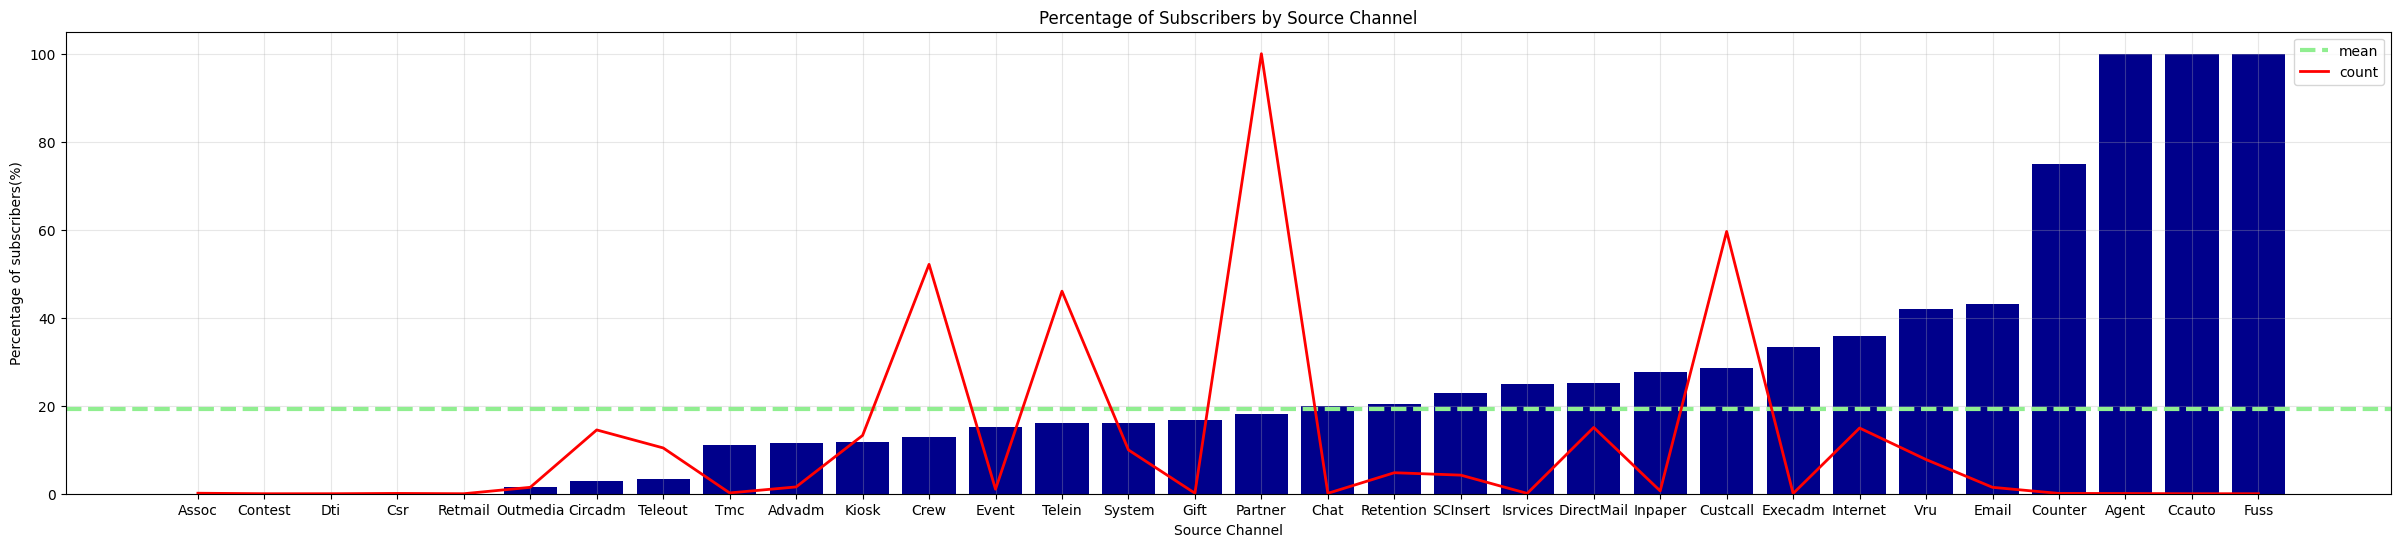

In [576]:
sc_cnt = df['Source_Channel_clean'].value_counts()
cross_sc = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')[1].sort_values()
plt.figure(figsize=(30, 6))
plt.bar(cross_sc.index, cross_sc * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(sc_cnt[cross_sc.index],100), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Source Channel')
plt.xlabel('Source Channel')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [577]:
cross_sch = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')
cross_sch = cross_sch[(cross_sch[0]>0.9)|(cross_sch[0]<0.75)]
Sch_count = df['Source_Channel_clean'].value_counts()
Sch_count = Sch_count[Sch_count >10].to_frame(name='count')
cross_sch.merge(Sch_count, left_index=True, right_index=True, how='inner')

,0,1,count
Source_Channel_clean,,,
Circadm,0.971831,0.028169,639
Custcall,0.714939,0.285061,2624
DirectMail,0.748494,0.251506,664
Email,0.569231,0.430769,65
Inpaper,0.724138,0.275862,29
Internet,0.641337,0.358663,658
Outmedia,0.984615,0.015385,65
Teleout,0.967320,0.032680,459
Vru,0.580175,0.419825,343


In [578]:
counts = df['Source_Channel_clean'].value_counts()
top_channels = counts[counts > 10].index.tolist()
df['Source_Channel_clean'] = df['Source_Channel_clean'].apply(lambda x: x if x in top_channels else 'Other Channel')

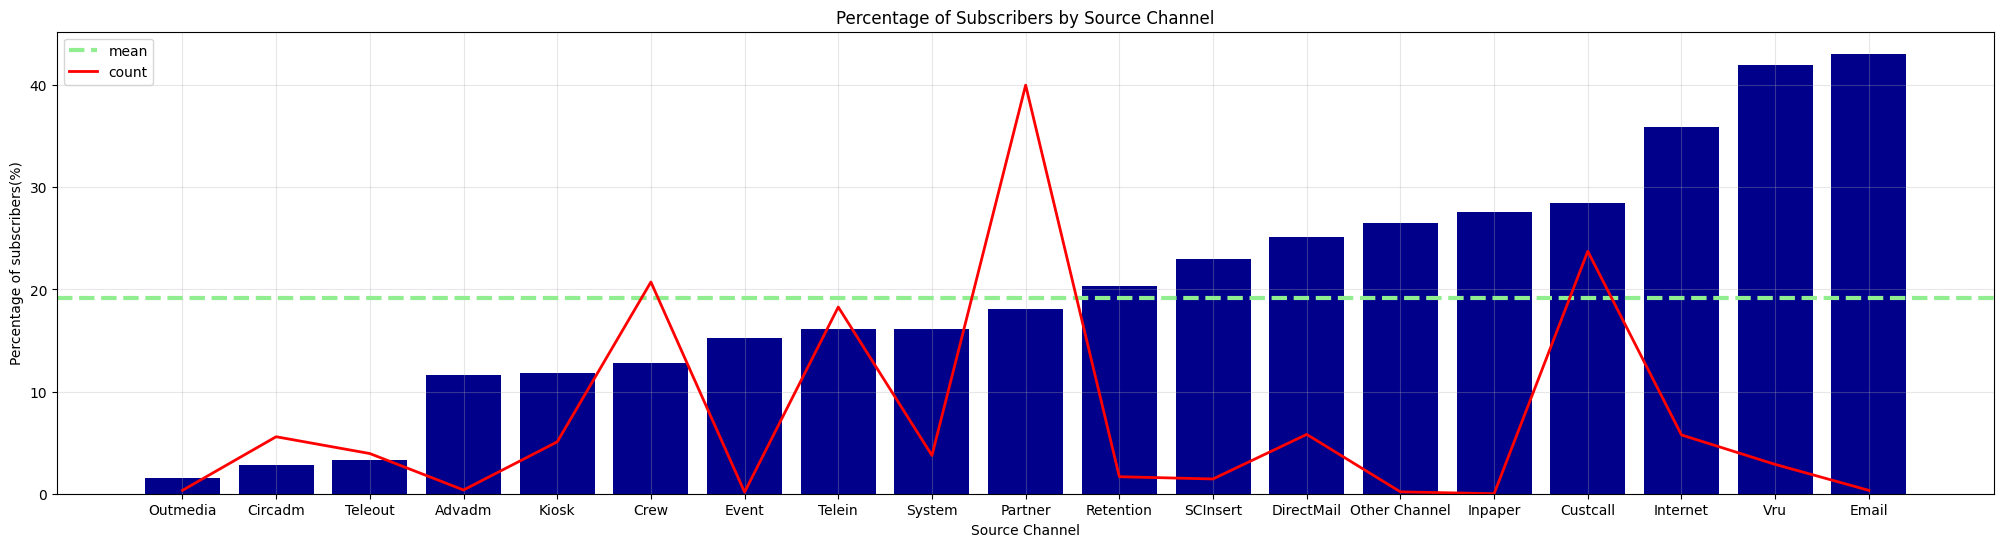

In [579]:
sc_cnt = df['Source_Channel_clean'].value_counts()
cross_sc = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')[1].sort_values()
plt.figure(figsize=(25, 6))
plt.bar(cross_sc.index, cross_sc * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(sc_cnt[cross_sc.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Source Channel')
plt.xlabel('Source Channel')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Dealing with missing values

In [580]:
targets = ['Age', 'weekly fee', 'Nielsen Prizm']

df_check = df.copy()

for col in df_check.select_dtypes(include=['object', 'category']).columns:
    df_check[col] = df_check[col].astype('category').cat.codes

corr_matrix = df_check.corr().abs()

print(corr_matrix['Age'].drop('Age').sort_values(ascending=False).head(1))
print(corr_matrix['weekly fee'].drop('weekly fee').sort_values(ascending=False).head(1))
print(corr_matrix['Nielsen Prizm'].drop('Nielsen Prizm').sort_values(ascending=False).head(1))

Year Of Residence    0.575567
Name: Age, dtype: float64
Deliverydays    0.621056
Name: weekly fee, dtype: float64
Language_filtered    0.127535
Name: Nielsen Prizm, dtype: float64


Age - Highest correlation with Years of residence; 

weekly fee - highest correlation with Delivery days

In [581]:
df['weekly fee'] = df.groupby('Deliverydays')['weekly fee'].transform(
        lambda x: x.fillna(x.median()))
df['weekly fee'] = df['weekly fee'].fillna(df['weekly fee'].median())

df['Age'] = df.groupby('Year Of Residence')['Age'].transform(
        lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].fillna(df['Age'].median())


Niesen Prizm i fill with new category "unknown NP"

In [582]:
df['Nielsen Prizm'] = df['Nielsen Prizm'].fillna('Unknown NP')

In [583]:
df.isna().sum()

HH Income               0
Home Ownership          0
Ethnicity               0
dummy for Children      0
Year Of Residence       0
Language                0
City                    0
County                  0
Zip Code                0
weekly fee              0
Deliveryperiod          0
Nielsen Prizm           0
reward program          0
Source Channel          0
Subscriber              0
Ethnicity_filtered      0
Language_filtered       0
City_filtered           0
Age                     0
T                       0
OL                      0
Deliveryperiod_clean    0
Deliverydays            0
is_home_owner           0
has_children            0
Source_Channel_clean    0
dtype: int64

## Checking relation with other columns

In [584]:
pd.crosstab(df['Nielsen Prizm'], df['Subscriber'], normalize='index')

Subscriber,0,1
Nielsen Prizm,,
FE,0.867785,0.132215
FM,0.825205,0.174795
FW,0.760000,0.240000
ME,0.858679,0.141321
MM,0.778458,0.221542
MW,0.756188,0.243812
Unknown NP,0.860465,0.139535
YE,0.862745,0.137255
YM,0.886123,0.113877


In [585]:
pd.crosstab(df['County'], df['Subscriber'], normalize='index')

Subscriber,0,1
County,,
LOS ANGELES,0.804772,0.195228
ORANGE,0.806982,0.193018
RIVERSIDE,0.874730,0.125270
SAN BERNARDINO,0.756303,0.243697


Nothing Serious

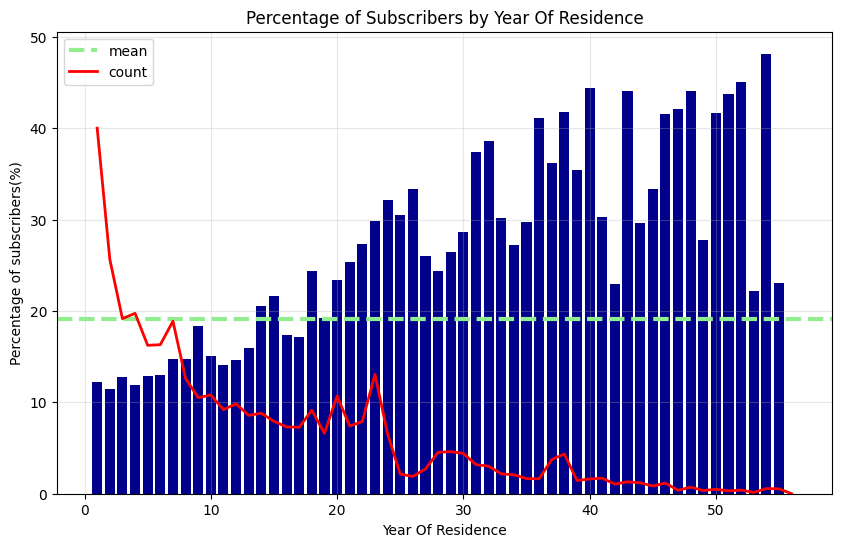

In [586]:
YoR_cnt = df['Year Of Residence'].value_counts()
cross_YoR = pd.crosstab(df['Year Of Residence'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.bar(cross_YoR.index, cross_YoR * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(YoR_cnt[cross_YoR.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Year Of Residence')
plt.xlabel('Year Of Residence')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

slight relation between Year of Residence and being a subscriber (it's mostly growing)

In [587]:
pd.crosstab(df['is_home_owner'], df['Subscriber'], normalize='index')

Subscriber,0,1
is_home_owner,,
0,0.884994,0.115006
1,0.781180,0.218820


People with home are more often subscribers

## reward program

In [588]:
df["reward program"].value_counts().head(20)

reward program
0     14862
1       232
2       113
3        90
4        60
5        53
6        42
8        28
7        24
11       20
9        19
14       16
12       15
24       11
10       11
13       10
16       10
25        9
21        8
32        8
Name: count, dtype: int64

decreasing tendency

In [589]:
ct = pd.crosstab(df['reward program'], df['Subscriber'], normalize='index')
ct = ct[ct[0]<0.60]
count = df['reward program'].value_counts()
ct.merge(count, left_index=True, right_index=True, how='inner')

,0,1,count
reward program,,,
1,0.435345,0.564655,232
2,0.442478,0.557522,113
3,0.511111,0.488889,90
4,0.383333,0.616667,60
5,0.301887,0.698113,53
...,...,...,...
212,0.000000,1.000000,1
216,0.000000,1.000000,1
244,0.000000,1.000000,1


In [590]:
ct.merge(count, left_index=True, right_index=True, how='inner')['count'].size, df['reward program'].unique().size

(97, 116)

Most reward programs have a relatively high tendency to be subscribers

C:\Users\Krzys\AppData\Local\Temp\ipykernel_18276\880494738.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


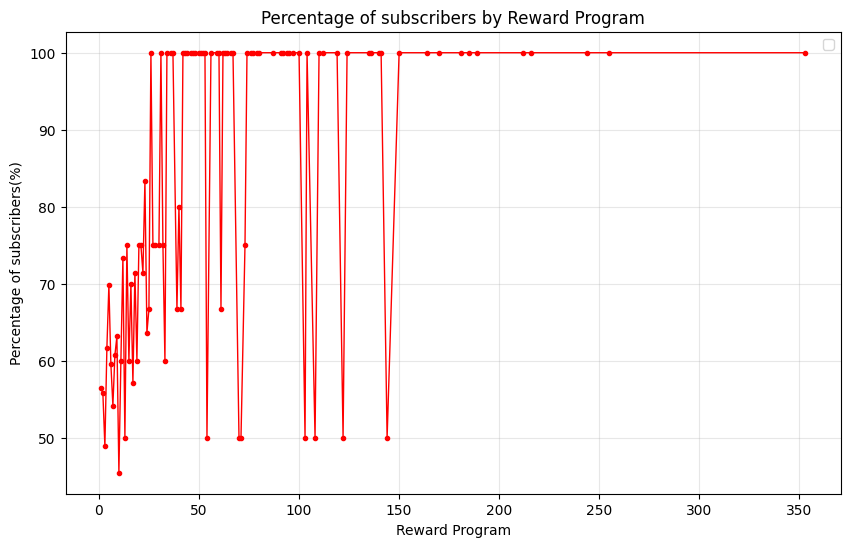

In [591]:
plt.figure(figsize=(10, 6))
plt.plot(ct.index, ct[1] * 100, marker='.', linestyle='-',linewidth = 1, color='red')
plt.title('Percentage of subscribers by Reward Program')
plt.xlabel('Reward Program')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Let's create a column: has reward

In [592]:
df['Has_Reward'] = (df['reward program'] > 0).astype(int)
pd.crosstab(df['Has_Reward'], df['Subscriber'], normalize='index')

Subscriber,0,1
Has_Reward,,
0,0.836832,0.163168
1,0.383686,0.616314


In [593]:
df_clean = df.drop(columns=['Home Ownership','dummy for Children', 'Zip Code',
                            'Language', 'Ethnicity', 'City', 'reward program',
                            'Deliveryperiod', 'Deliverydays', 'Source Channel'])

In [594]:
df_clean.head()

,HH Income,Year Of Residence,County,weekly fee,Nielsen Prizm,Subscriber,Ethnicity_filtered,Language_filtered,City_filtered,Age,T,OL,Deliveryperiod_clean,is_home_owner,has_children,Source_Channel_clean,Has_Reward
0,35000.0,1,LOS ANGELES,7.500,FM,0,German,German,LONG BEACH,27.0,0,0,7day,0,0,Circadm,0
1,750000.0,14,ORANGE,0.255,MW,1,unknown,unknown,NEWPORT COAST,52.0,0,0,SunOnly,1,1,Partner,0
2,112500.0,7,ORANGE,0.255,MW,1,Italian,English,IRVINE,47.0,0,0,SunOnly,1,1,Partner,0
3,225000.0,23,ORANGE,1.500,MW,0,English,English,LAGUNA NIGUEL,57.0,0,0,SunOnly,1,0,Internet,1
4,55000.0,23,ORANGE,8.500,MM,1,Italian,English,RANCHO SANTA MARGARITA,62.0,0,0,Thu-Sun,1,0,Crew,0


## New Correlation Matrix

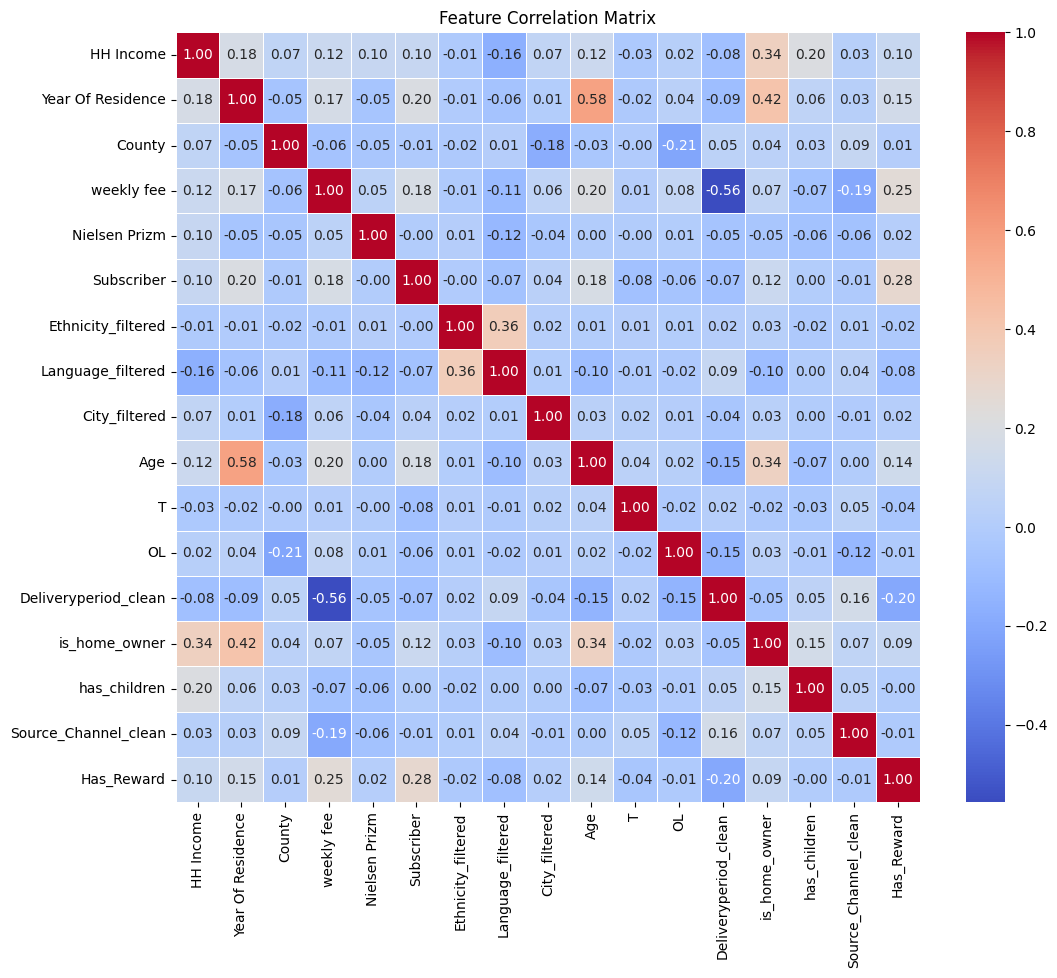

In [595]:
df_corr = df_clean.copy()

for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Creating a Model

In [596]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# %pip install category-encoders
from category_encoders import WOEEncoder

X = df_clean.drop('Subscriber', axis=1)
y = df_clean['Subscriber']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [597]:
numeric_features = ['HH Income', 'Year Of Residence', 'weekly fee', 'Age']
cat_onehot_features = ['County','Nielsen Prizm', 'Language_filtered', "Deliveryperiod_clean", "Source_Channel_clean","Ethnicity_filtered",'City_filtered']

In [598]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_onehot_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=0,probability=True))])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2564
           1       0.43      0.67      0.52       607

    accuracy                           0.77      3171
   macro avg       0.67      0.73      0.69      3171
weighted avg       0.82      0.77      0.79      3171



In [599]:
X[['County','Nielsen Prizm', "Ethnicity_filtered",'Language_filtered','City_filtered', "Source_Channel_clean", "Deliveryperiod_clean"]].nunique()

County                   4
Nielsen Prizm           10
Ethnicity_filtered      40
Language_filtered       16
City_filtered           51
Source_Channel_clean    19
Deliveryperiod_clean     7
dtype: int64

In [600]:
numeric_features = ['HH Income', 'Year Of Residence', 'weekly fee', 'Age']
cat_onehot_features = ['County','Nielsen Prizm', 'Language_filtered', "Deliveryperiod_clean", "Source_Channel_clean"]
cat_other_features = ["Ethnicity_filtered", 'City_filtered']

In [601]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_onehot_features),
        ('target', WOEEncoder(), cat_other_features)
    ],
    remainder='passthrough'
)

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=0, probability=True))])


model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2564
           1       0.43      0.69      0.53       607

    accuracy                           0.77      3171
   macro avg       0.67      0.74      0.69      3171
weighted avg       0.82      0.77      0.79      3171



Better with Woeencoder, but only for Ethnicity and City

In [ ]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='f1')
print(f"F1 scores: {cv_scores}")
print(f"Mean of F1s: {cv_scores.mean():.4f}")

F1 scores: [0.52056962 0.53654618 0.52631579 0.52545156 0.5235435 ]
Mean of F1s: 0.5265


Looking for best parameters with RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

model3 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', SVC(class_weight='balanced', random_state=0))])


param_distributions = [
    {'selector__k': [30, 60, 'all'],  
    'classifier__kernel': ['rbf'],
    'classifier__C': [0.1, 1, 10, 100], 
    'classifier__gamma': ['scale', 0.1, 0.01, 0.001]},

    {'selector__k': [30,60, 'all'],
    'classifier__kernel': ['linear'],
    'classifier__C': [0.1, 1, 10, 100]},

    {'selector__k': [30, 60, "all"],                     
    'classifier__kernel': ['poly'],
    'classifier__degree': [2, 3],
    'classifier__C': [1, 10]}
    ]

In [616]:
search = RandomizedSearchCV(model3, param_distributions, n_iter=50,      
                            scoring='f1', cv=5, n_jobs=-1,verbose=2,random_state=42)

search.fit(X_train, y_train)

print(f"\nBest parameters: {search.best_params_}")
print(f"Best F1: {search.best_score_:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'selector__k': 60, 'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 1}
Best F1: 0.5275


In [617]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2564
           1       0.43      0.70      0.53       607

    accuracy                           0.76      3171
   macro avg       0.67      0.74      0.69      3171
weighted avg       0.82      0.76      0.78      3171



In [618]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('selection', SelectKBest(score_func=f_classif, k=60)),
    ('classifier', SVC(kernel='rbf', C = 1, gamma = 'scale', class_weight='balanced', random_state=0, probability=True))
])

In [619]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_scores = final_model.decision_function(X_test) 

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.4f}")

Accuracy: 0.7647
Recall: 0.7002
F1 Score: 0.5326
ROC AUC: 0.8131


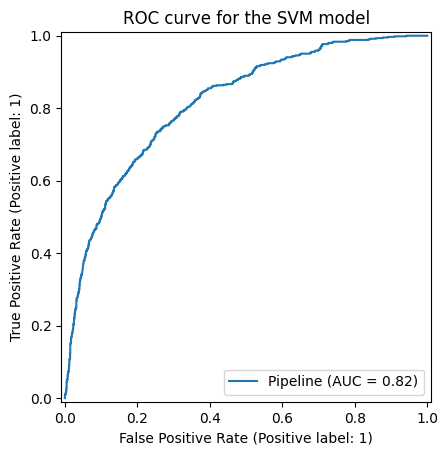

In [448]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC curve for the SVM model")
plt.show()

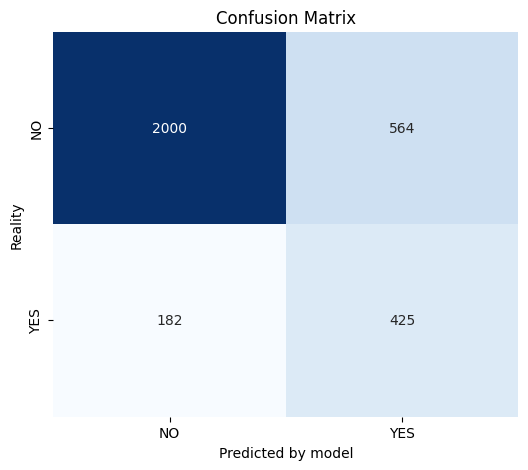

In [620]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.xlabel('Predicted by model')
plt.ylabel('Reality')
plt.title('Confusion Matrix')
plt.show()